Heart Failure Prediction

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('datasets/archive (6)/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000




Exploratory Data Analysis

total no of living cases: 203
total no of Died cases: 96


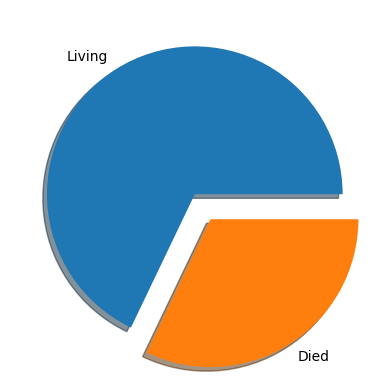

In [8]:
len_live=len(df["DEATH_EVENT"][df.DEATH_EVENT == 0])
len_death=len(df["DEATH_EVENT"][df.DEATH_EVENT == 1])

arr=np.array([len_live,len_death])
print("total no of living cases:",len_live)
print("total no of Died cases:",len_death)

plt.pie(arr,labels=["Living","Died"],explode=[0.0,0.2],shadow=True)
plt.show()

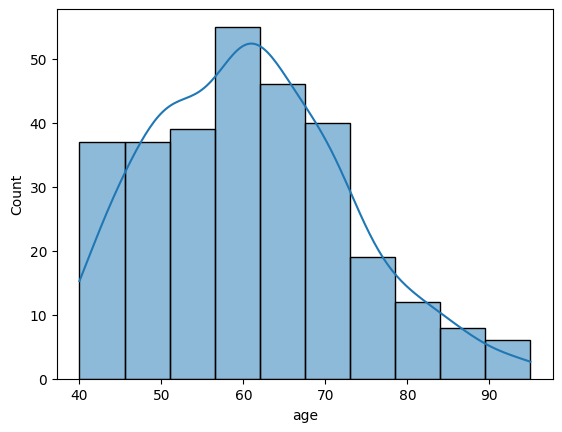

In [9]:
sns.histplot(df.age,kde=True) 
plt.show()

total no of living cases age above 50: 167
total no of Died cases age above 50: 85


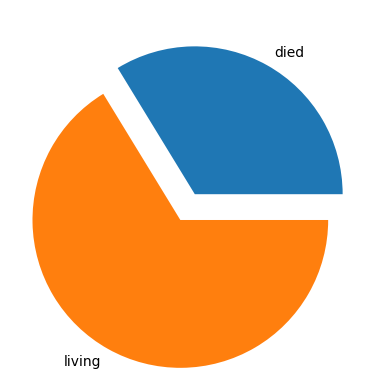

In [10]:
died50=len(df["DEATH_EVENT"][df.age>=50][df.DEATH_EVENT==1])
not_died50=len(df["DEATH_EVENT"][df.age>=50][df.DEATH_EVENT==0])

arr1=np.array([died50,not_died50])
print("total no of living cases age above 50:",not_died50)
print("total no of Died cases age above 50:",died50)

plt.pie(arr1,labels=["died","living"],explode=[0.0,0.2])
plt.show()



the no of diabetes people died : 40
the no of diabetes people living : 85


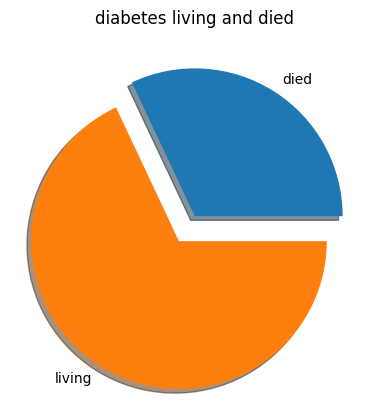

In [10]:
died_diabetes=len(df['DEATH_EVENT'][df.diabetes==1][df.DEATH_EVENT==1])
not_died_diabetes=len(df['DEATH_EVENT'][df.diabetes==1][df.DEATH_EVENT==0])

arr2=np.array([died_diabetes,not_died_diabetes])

print("the no of diabetes people died :",died_diabetes)
print("the no of diabetes people living :",not_died_diabetes)

plt.pie(arr2,labels=['died','living'],explode=[0.0,0.2],shadow=True)
plt.title("diabetes living and died")
plt.show()

<Axes: >

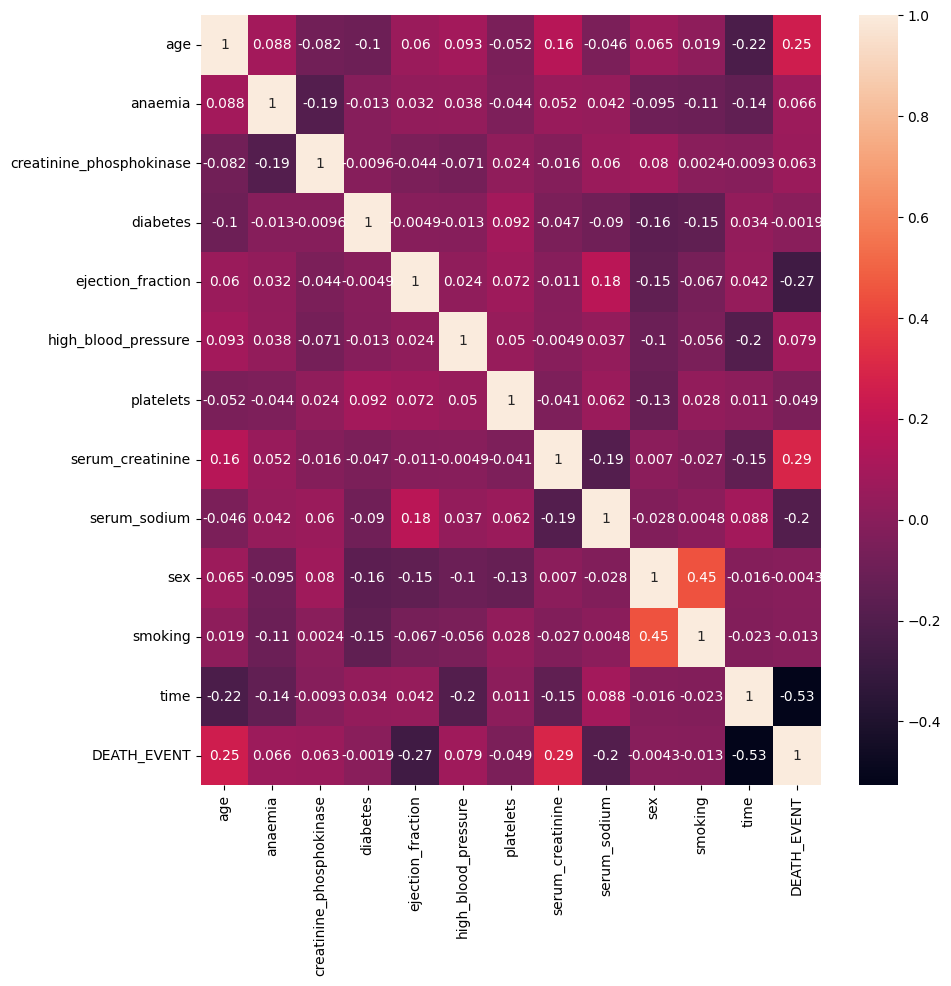

In [12]:
Corr=df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(Corr ,annot=True)

Dataset Development

In [13]:
from sklearn.model_selection import train_test_split

X=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=True)

print("the shape of X-train data is :",X_train.shape)
print("the shape of X-test data is :",X_test.shape)
print("the shape of y-train data is :",y_train.shape)
print("the shape of y-test data is :",y_test.shape)


the shape of X-train data is : (209, 12)
the shape of X-test data is : (90, 12)
the shape of y-train data is : (209,)
the shape of y-test data is : (90,)


In [14]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

def evaluating_model(y_test,y_pred):
    print("the accuracy score is :",accuracy_score(y_test,y_pred))
    print("the precision score is :",precision_score(y_test,y_pred))
    print("the recall score is :",recall_score(y_test,y_pred))
    print("the confusion_matrix is :\n",confusion_matrix(y_test,y_pred))

Model Implementation

In [15]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression(max_iter=10000)
lr_clf.fit(X_train,y_train)

lr_clf_pred=lr_clf.predict(X_test)

In [16]:
y_pred=lr_clf.predict(X_test)
evaluating_model(y_test,y_pred)

the accuracy score is : 0.8222222222222222
the precision score is : 0.7083333333333334
the recall score is : 0.6538461538461539
the confusion_matrix is :
 [[57  7]
 [ 9 17]]


In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pipe=make_pipeline(StandardScaler(),LogisticRegression())
lr_clf_pipe.fit(X_train,y_train)

lr_clf_pipe_pred=lr_clf_pipe.predict(X_test)

In [18]:
y_pred=lr_clf_pipe.predict(X_test)
evaluating_model(y_test,y_pred)

the accuracy score is : 0.8333333333333334
the precision score is : 0.7619047619047619
the recall score is : 0.6153846153846154
the confusion_matrix is :
 [[59  5]
 [10 16]]


In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1,10,100,1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True, verbose= 3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [20]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

In [21]:
svc = SVC(C = 10, gamma = 0.0001) 
svc.fit(X_train, y_train) 
y_pred2 = svc.predict(X_test) 
evaluating_model(y_test, y_pred2)

the accuracy score is : 0.7
the precision score is : 0.4
the recall score is : 0.07692307692307693
the confusion_matrix is :
 [[61  3]
 [24  2]]


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2, error_score="raise") 
    rand_clf.fit(X_train, y_train)
    
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model  

randomized_search(params={
    'criterion': ['entropy', 'gini'],
    'splitter': ['random', 'best'],
    'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01],
    'min_samples_split': [2, 3, 4, 5, 6, 8, 10],
    'min_samples_leaf': [1, 0.01, 0.02, 0.03, 0.04],
    'min_impurity_decrease': [0.0, 0.0005, 0.005, 0.05, 0.10],
    'max_leaf_nodes': [10, 15, 20, 25, 30, None],
    'max_features': [None, "sqrt", "log2", 0.95, 0.90, 0.85, 0.80],
    'max_depth': [None, 2, 4, 6, 8]
})

Training score: 0.847
Test score: 0.844


DecisionTreeClassifier(max_depth=4, max_features=0.9, max_leaf_nodes=10,
                       min_impurity_decrease=0.1, min_samples_leaf=0.03,
                       min_samples_split=6, min_weight_fraction_leaf=0.005,
                       random_state=2)

In [23]:
ds_clf = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random') 
ds_clf.fit(X_train, y_train) 
pred4 = ds_clf.predict(X_test) 
evaluating_model(y_test, pred4)

the accuracy score is : 0.7666666666666667
the precision score is : 0.5925925925925926
the recall score is : 0.6153846153846154
the confusion_matrix is :
 [[53 11]
 [10 16]]


In [24]:
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':[None, "sqrt", "log2", 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2))

Training score: 0.852
Test score: 0.856


RandomForestClassifier(max_depth=2, max_features=0.5, min_samples_leaf=4,
                       random_state=2)

In [25]:
rf_clf = RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2) 
rf_clf.fit(X_train, y_train)  
pred5 = rf_clf.predict(X_test) 
evaluating_model(y_test, pred5)

the accuracy score is : 0.8444444444444444
the precision score is : 0.8
the recall score is : 0.6153846153846154
the confusion_matrix is :
 [[60  4]
 [10 16]]


In [26]:
from xgboost import XGBClassifier

xgb1 = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=4,
    n_estimators=400,
    subsample=1.0,
    eval_metric="logloss"
)


eval_set = [(X_test, y_test)]


xgb1.fit(
    X_train, 
    y_train, 
    eval_set=eval_set, 
    verbose=True
)

[0]	validation_0-logloss:0.56919
[1]	validation_0-logloss:0.53539
[2]	validation_0-logloss:0.50768
[3]	validation_0-logloss:0.48368
[4]	validation_0-logloss:0.46246
[5]	validation_0-logloss:0.44499
[6]	validation_0-logloss:0.43437
[7]	validation_0-logloss:0.42213
[8]	validation_0-logloss:0.41131
[9]	validation_0-logloss:0.40359
[10]	validation_0-logloss:0.39564
[11]	validation_0-logloss:0.38908
[12]	validation_0-logloss:0.38462
[13]	validation_0-logloss:0.38389
[14]	validation_0-logloss:0.37774
[15]	validation_0-logloss:0.37193
[16]	validation_0-logloss:0.36907
[17]	validation_0-logloss:0.36368
[18]	validation_0-logloss:0.35883
[19]	validation_0-logloss:0.35722
[20]	validation_0-logloss:0.35401
[21]	validation_0-logloss:0.35031
[22]	validation_0-logloss:0.34866
[23]	validation_0-logloss:0.34635
[24]	validation_0-logloss:0.34512
[25]	validation_0-logloss:0.34343
[26]	validation_0-logloss:0.34328
[27]	validation_0-logloss:0.34034
[28]	validation_0-logloss:0.34089
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [27]:
pred6 = xgb1.predict(X_test) 
evaluating_model(y_test, pred6)

the accuracy score is : 0.8444444444444444
the precision score is : 0.7142857142857143
the recall score is : 0.7692307692307693
the confusion_matrix is :
 [[56  8]
 [ 6 20]]


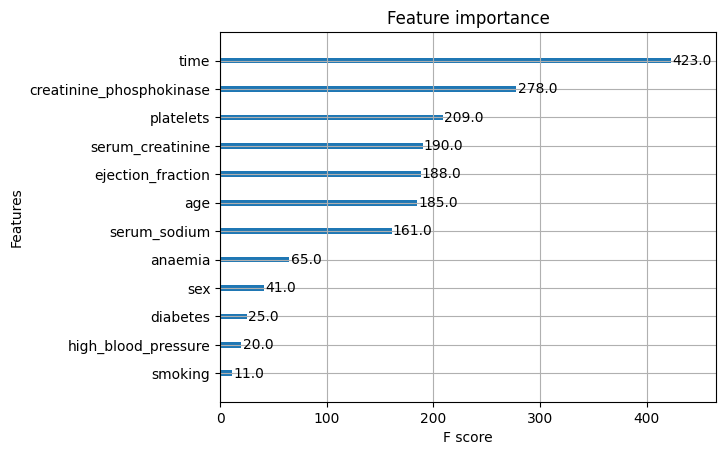

In [71]:
from xgboost import plot_importance

plot_importance(xgb1)
plt.show()

In [73]:
import joblib 
joblib.dump(xgb1, 'model.pkl') 
model = joblib.load('model.pkl' ) 
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])